### Before TOV: 
### 1. Using orbital dynamics (frequency vs mass–radius) to plot approximate neutron star M–R relation plot

In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

#### Assumptions: before using real data
1. Ideal
2. G = 1
3. assuming mass vary from 0.5 – 3𝑀⊙
4. Assume 𝑓 = constant (1000 Hz)

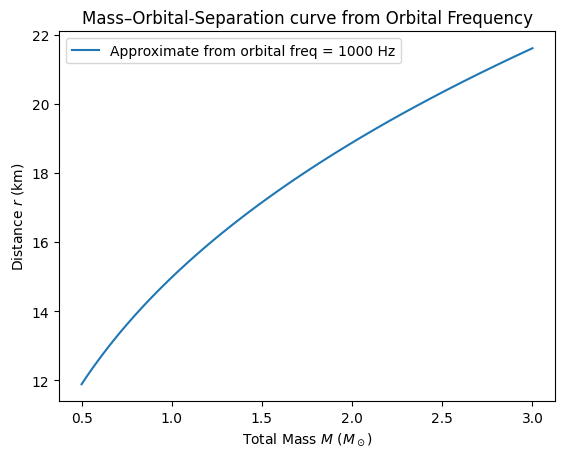

In [8]:
# plot using the assumptions
G = 6.67430e-11          
Msun = 1.98847e30         
pi = np.pi
f = 1000    

# Mass range in solar masses
M_solar = np.linspace(0.5, 3.0, 100)
M_kg = M_solar * Msun

# orbital radius from the formula
r_m = (G * M_kg / (2 * pi * f)**2) ** (1/3)

# Convert to km for plot
r_km = r_m / 1e3

# Plot
plt.plot(M_solar, r_km, label= 'Approximate from orbital freq = 1000 Hz')
plt.xlabel('Total Mass $M$ ($M_\\odot$)')
plt.ylabel('Distance $r$ (km)')
plt.title('Mass–Orbital-Separation curve from Orbital Frequency')

plt.legend()
plt.show()

#### Virial Theorem:


Polytropic Equation of State: P = K \\rho^\\gamma <br>

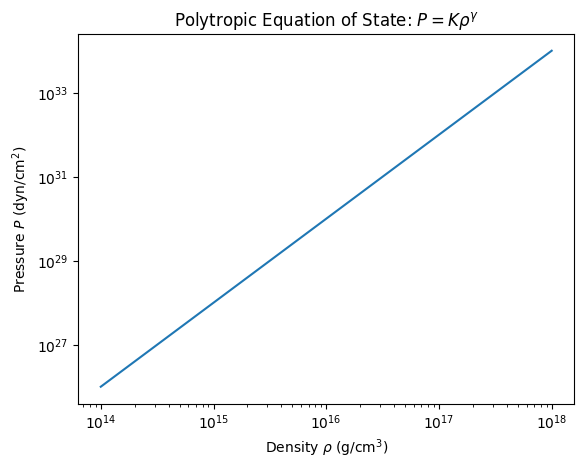

In [9]:
rho = np.logspace(14, 18, 100)  # g/cm^3, typical for neutron stars
gamma = 2.0
K = 1e-2                        # constant to scale

P = K * rho**gamma

plt.loglog(rho, P)
plt.xlabel(f'Density $\\rho$ (g/cm$^3$)')
plt.ylabel('Pressure $P$ (dyn/cm$^2$)')
plt.title('Polytropic Equation of State: $P = K \\rho^\\gamma$')

#plt.grid(True, which='both')
plt.show()


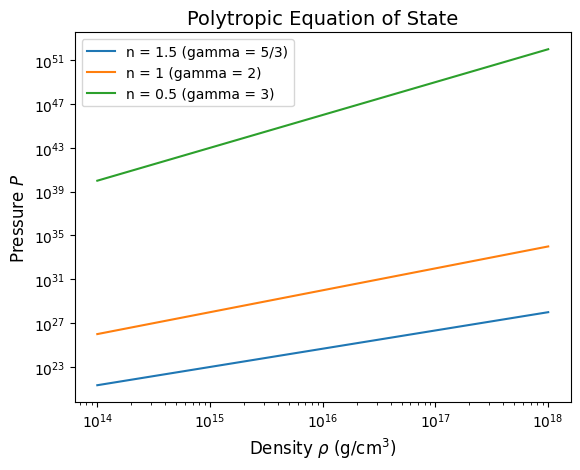

In [10]:
# Polytropic Equation of State: P = K * rho^gamma
# Define density range (in g/cm^3)
rho = np.logspace(14, 18, 500)  # typical neutron star core densities

# Define multiple polytropic indices (gammas)
polytropes = {
    'n = 1.5 (gamma = 5/3)': 5/3,
    'n = 1 (gamma = 2)': 2.0,
    'n = 0.5 (gamma = 3)': 3.0
}

# Polytropic constant K (dummy scaling, units arbitrary for now)
K = 1e-2


for label, gamma in polytropes.items():
    P = K * rho**gamma
    plt.loglog(rho, P, label=label)

# Plot settings
plt.xlabel(r'Density $\rho$ (g/cm$^3$)', fontsize=12)
plt.ylabel('Pressure $P$', fontsize=12)
plt.title('Polytropic Equation of State', fontsize=14)

plt.legend()
plt.show()


In [11]:
'''def tov_rhs(r, y):
    P, m = y
    rho = eos_inverse(P)
    dPdr =                                     # TOV
    dmdr = 4 * np.pi * r**2 * rho
    return [dPdr, dmdr]

# initial values
r0 = 1e-6                      # Start near zero, not at zero
P0 = 
y0 = [P0, 0]


# Integrate until P ~ 0
sol = odeint(tov_rhs, [r0, r_max], y0, ...)'''

'def tov_rhs(r, y):\n    P, m = y\n    rho = eos_inverse(P)\n    dPdr =                                     # TOV\n    dmdr = 4 * np.pi * r**2 * rho\n    return [dPdr, dmdr]\n\n# initial values\nr0 = 1e-6                      # Start near zero, not at zero\nP0 = \ny0 = [P0, 0]\n\n\n# Integrate until P ~ 0\nsol = odeint(tov_rhs, [r0, r_max], y0, ...)'

In [26]:
# Constants (SI)                 
K     = 1e-2          # Pa·(kg m⁻3)^{-γ}
gamma = 2.0

# Constants
G = 6.67430e-11
c = 2.99792458e8
M_sun = 1.98847e30
km = 1e3


# Work in geometrized units:  G = c = 1
# conversion: 1 meter   -> 1 meter / (G/c^2)
G_over_c2 = G / c**2        # m kg^-1
meter_to_geom = 1.0 / G_over_c2   # kg
kg_to_geom = 1.0             # by definition

# Polytropic EOS parameters 
K =  1e-1
gamma = 2.0

In [27]:

def eos_pressure(rho):
    return K * rho**gamma

def eos_rho_from_P(P):
    return (P / K) ** (1.0 / gamma)

def tov_rhs(r, y):
    P, m = y
    if P <= 0:
        return [0, 0]
    rho = eos_rho_from_P(P)
    dPdr = - (rho * c**2 + P) * (G * m + 4 * np.pi * G * P * r**3 / c**2) / (r * (r - 2 * G * m / c**2))
    dmdr = 4 * np.pi * r**2 * rho
    return [dPdr, dmdr]

def integrate_star(rho_c):
    P0 = eos_pressure(rho_c)
    y0 = [P0, 0.0]
    r0 = 1.0     # start at 1 m to avoid singularity
    r_max = 2e6  # integrate up to 2000 km
    
    sol = solve_ivp(tov_rhs, (r0, r_max), y0, max_step= 100.0, dense_output= True, events= lambda r, y: y[0])
    R = sol.t_events[0][0] if sol.t_events[0].size>0 else sol.t[-1]
    M = sol.y[1][-1]
    return R, M

In [28]:
central_rhos = np.logspace(17, 18.5, 20)  # kg m^-3
R_list= []; M_list= []

for rho_c in central_rhos:
    R, M = integrate_star(rho_c)
    R_km = R / km
    M_sun = M / Msun
    R_list.append(R_km)
    M_list.append(M_sun)

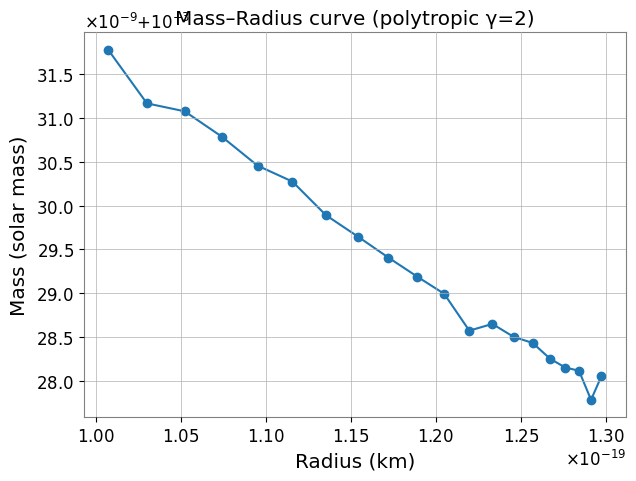

In [29]:
plt.figure(figsize=(7,5))
plt.plot(M_list, R_list, marker='o')
plt.xlabel("Radius (km)")
plt.ylabel("Mass (solar mass)")
plt.title("Mass–Radius curve (polytropic γ=2)")
plt.grid(True)
plt.show()

## Neutron Star Mergers

In [31]:
#!pip install gwosc pycbc